In [1]:
import numpy as np

np.random.seed(42)
m=100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

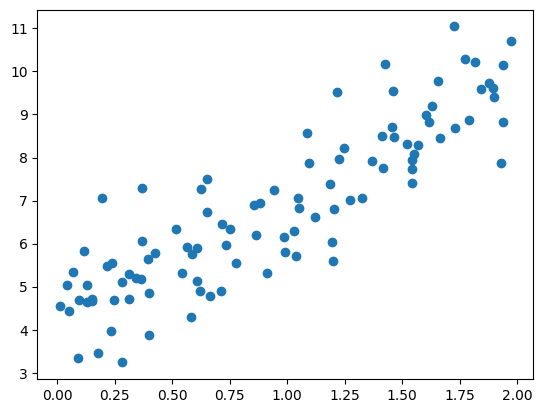

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Text(0.5, 0, 'x1')

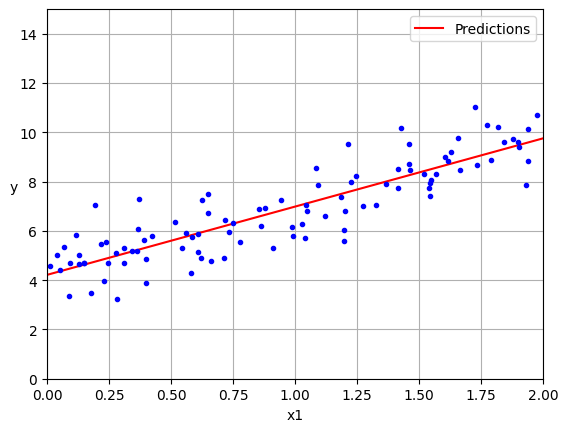

In [6]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.legend()
plt.grid()
plt.axis([0, 2, 0, 15])
plt.ylabel('y', rotation=0)
plt.xlabel('x1')

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)
linear_regression.intercept_, linear_regression.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
linear_regression.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

Gradient Descent finds the way to decrease the cost function until it finds a local minimum.

It works well with convex functions, as they only have one minimum (Convex functions resemble a bowl)

### Batch Gradient Descent

In [10]:
learning_rate = 0.1
n_epochs = 1_000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - learning_rate * gradients
theta

array([[4.21509616],
       [2.77011339]])

In [11]:
# Stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50

def learning_scheduler(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_scheduler(epoch * m + iteration)
        theta = theta - eta * gradients
theta

array([[4.21076011],
       [2.74856079]])

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(max_iter=1_000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_regressor.fit(X, y.ravel())
sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.21278812]), array([2.77270267]))

## Polynomial Regression

In [13]:
np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1 )

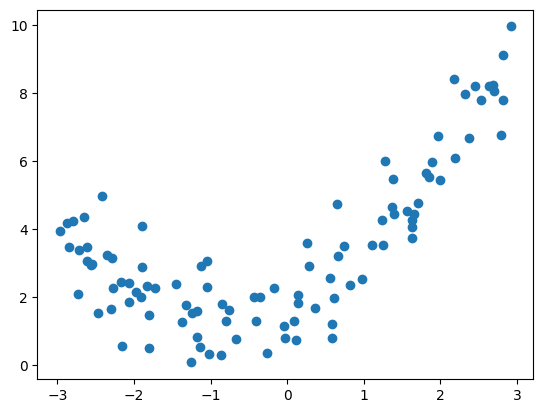

In [14]:
plt.scatter(X, y)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_polynomial = polynomial_features.fit_transform(X)
X[0], X_polynomial[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [16]:
linear_regression = LinearRegression()
linear_regression.fit(X_polynomial, y)
linear_regression.intercept_, linear_regression.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Text(0.5, 0, 'x1')

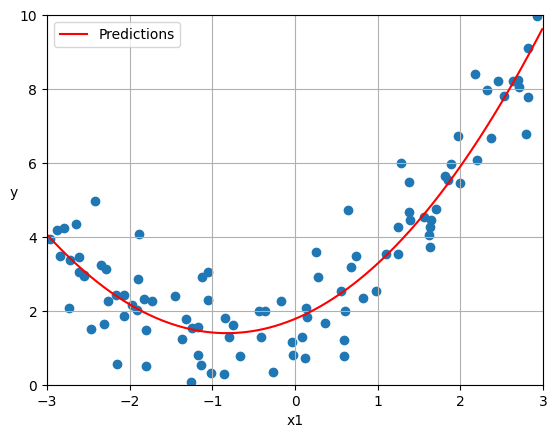

In [17]:
plt.scatter(X, y)
x_test = np.arange(-3., 3., 0.01).reshape(-1, 1)
y_test = linear_regression.predict(polynomial_features.transform(x_test))
plt.plot(x_test, y_test, 'r', label='Predictions')
plt.axis([-3, 3, 0, 10])
plt.legend()
plt.grid()
plt.ylabel('y', rotation=0)
plt.xlabel('x1')

## Learning Curves

Text(0.5, 0, 'Training set size')

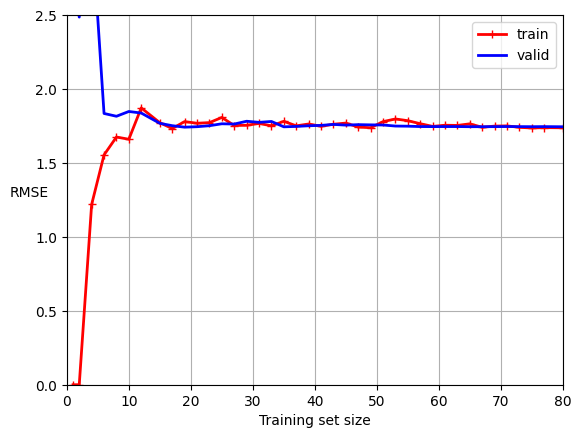

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=2, label='valid')
plt.grid()
plt.legend()
plt.axis([0,80, 0, 2.5])
plt.ylabel('RMSE', rotation=0)
plt.xlabel('Training set size')

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('Polynomial Transformer', PolynomialFeatures(degree=10, include_bias=False)),
    ('Linear Regression', LinearRegression())
])

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')

Text(0.5, 0, 'Training set size')

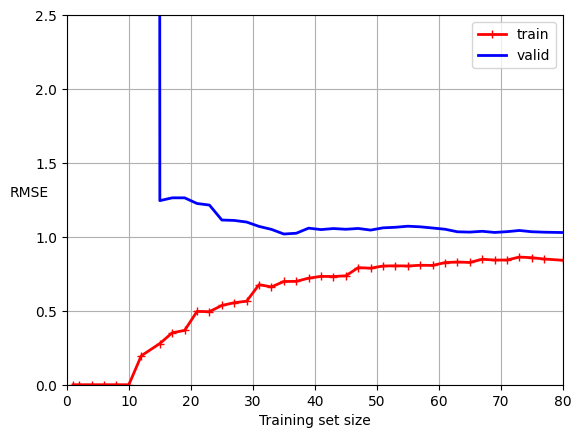

In [20]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=2, label='valid')
plt.grid()
plt.legend()
plt.axis([0, 80, 0, 2.5])
plt.ylabel('RMSE', rotation=0)
plt.xlabel('Training set size')


## Regularized Linear Models

### Ridge Regression

Ridge Regression depends on scaled data (Normalized or Standardized)

In [21]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=0.1, solver='cholesky')
ridge_regression.fit(X, y)
ridge_regression.predict([[1.5]])

array([[4.82899748]])

In [22]:
sgd_regressor = SGDRegressor(penalty='l2', alpha=0.1/m, tol=None, max_iter=1_000, eta0=0.01, random_state=42)
sgd_regressor.fit(X, y.ravel())
sgd_regressor.predict([[1.5]])

array([4.82830117])

### Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(X, y)
lasso_regression.predict([[1.5]])

array([4.77621741])

### Elastic Net Regression

In [24]:
from sklearn.linear_model import ElasticNet

elastic_regression = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_regression.fit(X, y)
elastic_regression.predict([[1.5]])

array([4.78114505])

### Early Stopping

In [25]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = Pipeline([
    ("Polynomial Features", PolynomialFeatures(degree=90, include_bias=False)),
    ('Standard Scaler', StandardScaler())
])

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_regressor = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
epochs = 500
best_valid_rmse = float('inf')

for epoch in range(epochs):
    sgd_regressor.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_regressor.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        # Very important library to know
        best_model = deepcopy(sgd_regressor)

## Logistic Regression

### Decision Boundaries

In [26]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [27]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Text(0, 0.5, 'Probability')

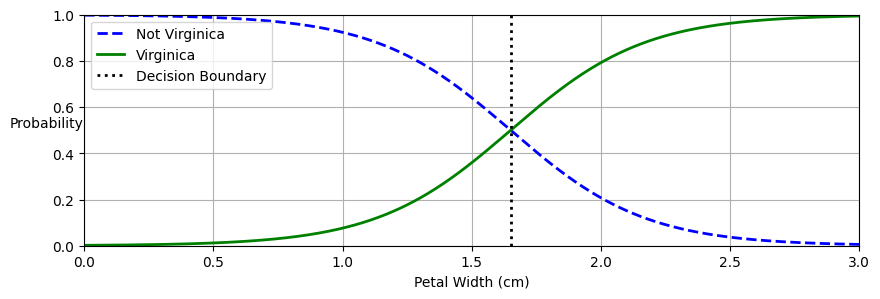

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(10, 3))
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Virginica')
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Virginica')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2, label='Decision Boundary')

plt.grid()
plt.legend()
plt.axis([0,3,0,1])
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability', rotation=0)


### Softmax regression

In [31]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_regression = LogisticRegression(C=30, random_state=42)
softmax_regression.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [32]:
softmax_regression.predict([[5, 2]])

array([2])

In [33]:
softmax_regression.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])